In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
plt.rcParams["figure.figsize"] = (16,10)

In [36]:

df = pd.read_csv('SKA_B-2001-01-01-2019-09-12.csv',sep=';', skiprows=1, decimal=',')
print(df.head())
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df = df.sort_index()
df.head()

         Date     Bid     Ask  Opening price  High price  Low price  \
0  2019-09-12  189.65  189.75         187.00      190.80     186.00   
1  2019-09-11  189.60  189.75         189.50      190.75     189.20   
2  2019-09-10  189.45  189.50         188.35      190.35     187.85   
3  2019-09-09  188.95  189.00         190.70      190.75     188.90   
4  2019-09-06  190.35  190.50         191.15      191.45     188.65   

   Closing price  Average price  Total volume      Turnover  Trades  \
0         189.75        189.238     1393117.0  2.636191e+08    4672   
1         190.10        190.008     1520982.0  2.889250e+08    3003   
2         189.80        189.334      841743.0  1.593680e+08    3237   
3         189.45        189.598      676016.0  1.281734e+08    2479   
4         190.70        190.243      849708.0  1.616404e+08    3428   

   Unnamed: 11  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  


,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
Date,,,,,,,,,,,
2001-01-02,94.00,94.250,0.0,98.00,94.000,94.25,NaN,1252948.0,1.198615e+08,433,NaN
2001-01-03,93.00,95.000,0.0,94.25,90.000,93.75,NaN,1948908.0,1.801793e+08,418,NaN
2001-01-04,91.75,92.000,0.0,95.50,90.000,92.00,NaN,1958600.0,1.836951e+08,532,NaN
2001-01-05,95.50,95.625,0.0,96.00,90.000,95.50,NaN,756832.0,7.148814e+07,241,NaN
2001-01-08,95.75,96.250,0.0,96.00,93.375,95.50,NaN,2191008.0,2.075079e+08,547,NaN


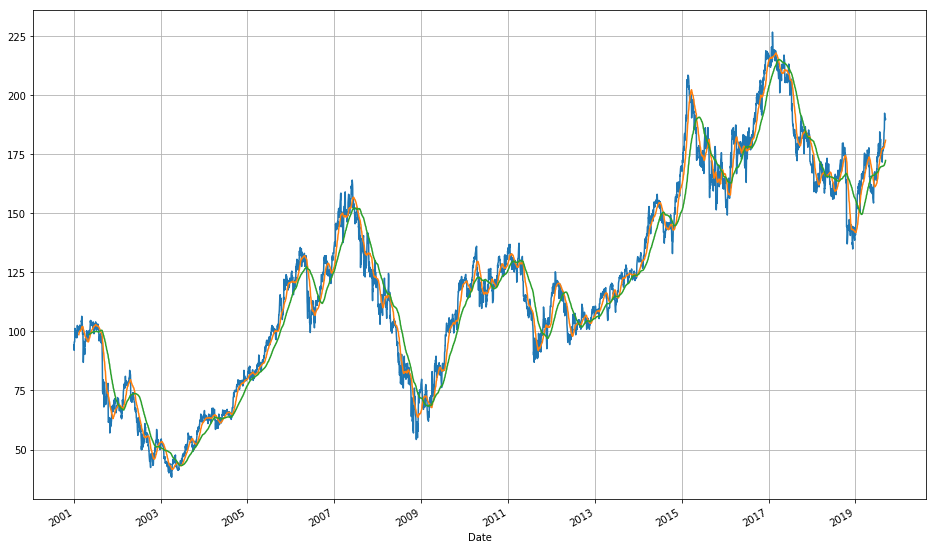

In [42]:

ax = df['Closing price'].plot()
df['Closing price'].rolling(30).mean().plot(ax=ax)
df['Closing price'].rolling(90).mean().plot(ax=ax)
ax.grid()

In [78]:
from_date = '2016'
df_close = df[df.index >= from_date]['Closing price'].rename('tt').to_frame()
days1 = 60
days2 = 120
df_close['tt_short'] = df_close['tt'].rolling(days1).mean()
df_close['tt_long'] = df_close['tt'].rolling(days2).mean()
df_close = df_close.dropna()
df_close.head()

,tt,tt_short,tt_long
Date,,,
2016-06-27,163.0,176.895000,173.003333
2016-06-28,166.2,176.576667,173.072500
2016-06-29,172.3,176.326667,173.207500
2016-06-30,175.4,176.180000,173.398333
2016-07-01,179.8,176.156667,173.626667


In [79]:
df_close['buy'] = 0
df_close.loc[df_close['tt_long'] < df_close['tt_short'], 'buy'] = 1
df_close['buy'] = df_close['buy'].diff().dropna()

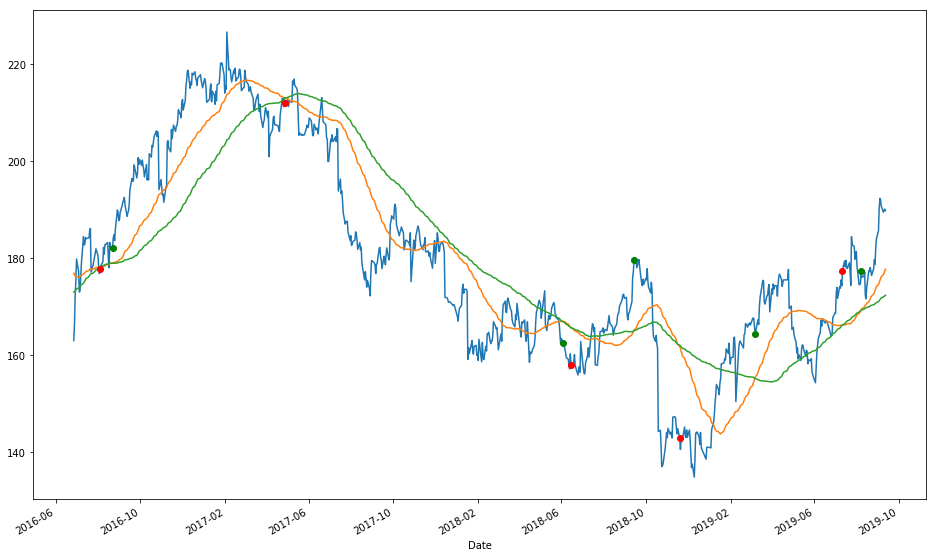

In [80]:
ax = df_close['tt'].plot()
df_close['tt_short'].plot(ax=ax)
df_close['tt_long'].plot(ax=ax)
df_close.loc[df_close['buy'] == 1, 'tt'].plot(ax=ax, ls='', marker='o', color='g')
df_close.loc[df_close['buy'] == -1, 'tt'].plot(ax=ax, ls='', marker='o', color='r')

In [81]:
df_close

,tt,tt_short,tt_long,buy
Date,,,,
2016-06-27,163.00,176.895000,173.003333,NaN
2016-06-28,166.20,176.576667,173.072500,0.0
2016-06-29,172.30,176.326667,173.207500,0.0
2016-06-30,175.40,176.180000,173.398333,0.0
2016-07-01,179.80,176.156667,173.626667,0.0
2016-07-04,177.20,176.068333,173.818333,0.0
2016-07-05,173.00,176.173333,173.971667,0.0
2016-07-06,173.20,176.243333,174.118333,0.0
2016-07-07,175.90,176.338333,174.299167,0.0


In [86]:
import numpy as np

a= np.array([1,2,3])
np.append(np.inf,a)

array([inf,  1.,  2.,  3.])